<a href="https://colab.research.google.com/github/Lythea/Final_LabExam_ML/blob/main/FinalLabExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your car evaluation dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset2.csv')

# Display basic information about the dataset
print(dataset.info())
print(dataset.columns)

# Handle missing values
dataset.dropna(inplace=True)

# Handle duplicates
duplicates = dataset.duplicated()
print("Number of duplicate rows:", duplicates.sum())
dataset = dataset[~duplicates]

# Encode categorical variables
encoder = LabelEncoder()
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = encoder.fit_transform(dataset[col])

# Print summary statistics after cleaning
print("\nSummary Statistics After Cleaning:")
print(dataset.describe())

# Summary of cleaning process
initial_rows, initial_cols = dataset.shape[0], dataset.shape[1]
print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Rows Removed: {duplicates.sum()}")
print(f"Columns Removed: {len(dataset.columns) - initial_cols}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')
Number of duplicate rows: 0

Summary Statistics After Cleaning:
            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     1.500000     1.000000     1.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       0.000000     0.000000     0.000000     0.0

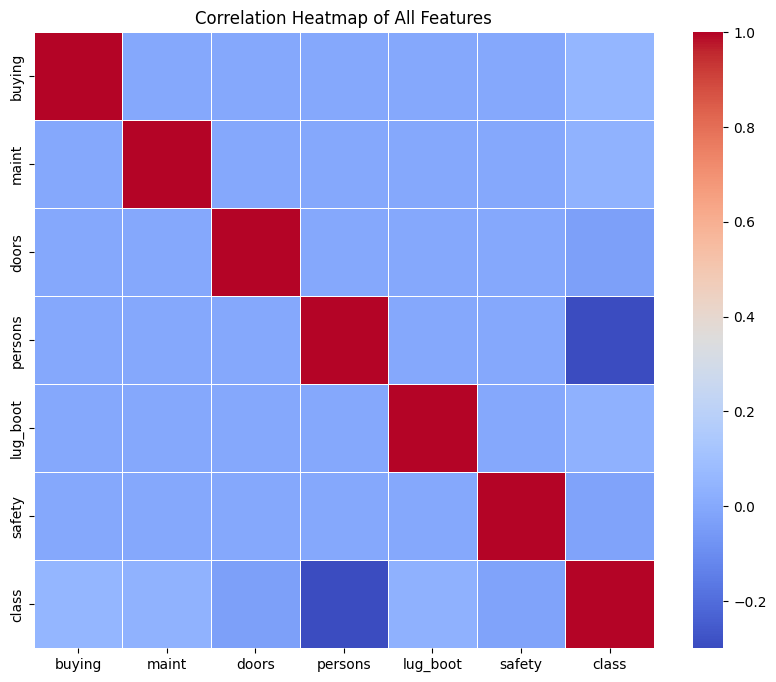

Number of selected features matches the expected count.


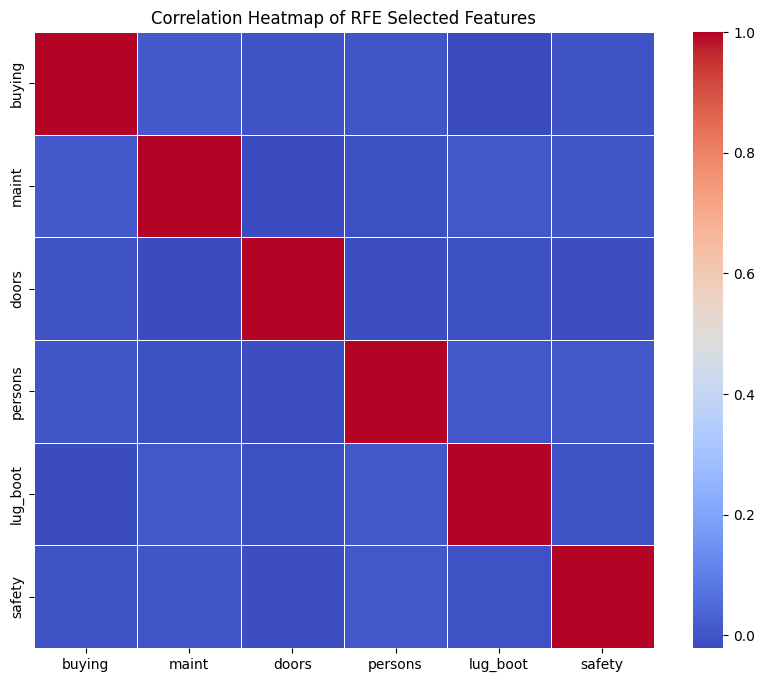

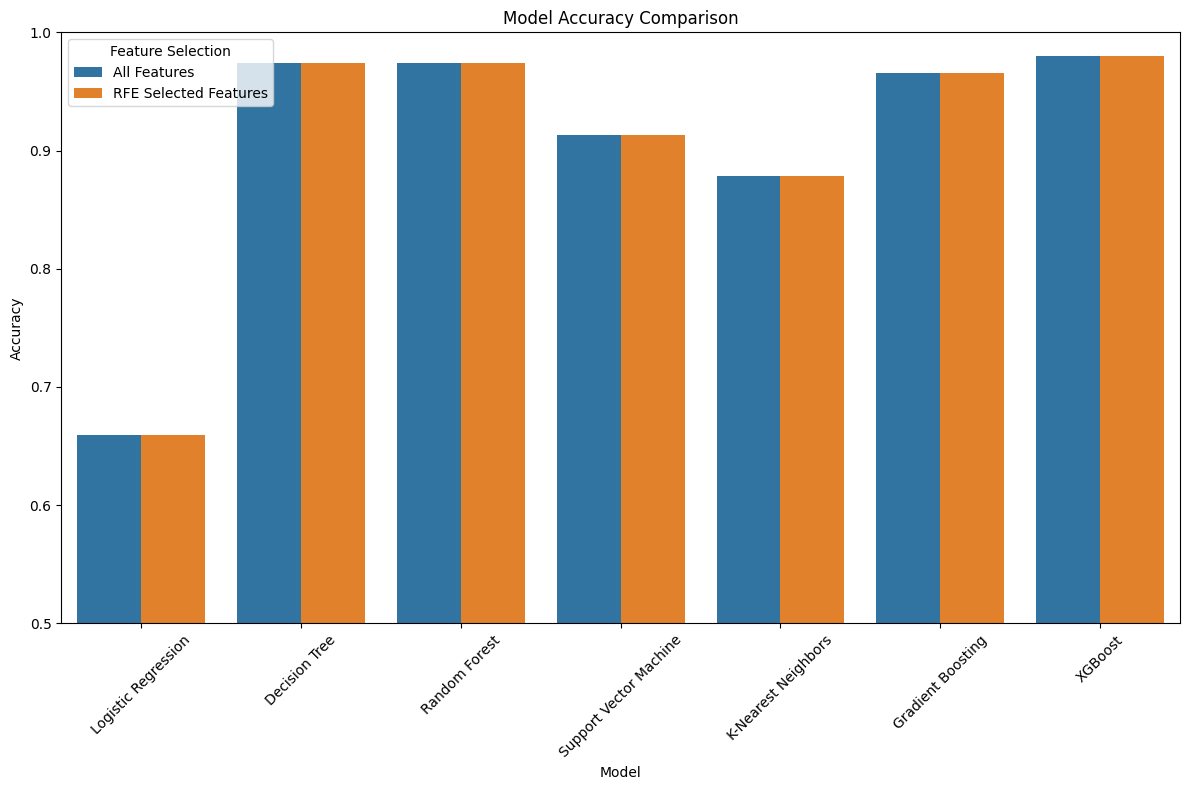

In [ ]:


# Calculate correlation matrix for all features
correlation_matrix_all = dataset.corr()

# Plot correlation heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# Split the data into training and testing sets
X = dataset.drop(columns=['class'])  # Assuming 'class' is the target variable
y = dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RFE object and specify the number of features to select
n_features_to_select = X_train.shape[1]  # Number of columns in X_train
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=n_features_to_select)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train, y_train)

# Check the number of selected features
if len(rfe.support_) != n_features_to_select:
    print("Error: The number of selected features does not match the expected count.")
else:
    print("Number of selected features matches the expected count.")

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Convert selected features to DataFrame
df_selected_features = pd.DataFrame(X_train_selected, columns=[X.columns[i] for i, selected in enumerate(rfe.support_) if selected])

# Calculate correlation matrix for selected features
correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

random_seed = 42

# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_seed),
    "XGBoost": XGBClassifier(random_state=random_seed)
}

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Plotting
results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()


In [ ]:
results_all_features = {}
print("All Features")
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy
    print(f"{name} Accuracy (All Features): {accuracy:.4f}")

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
print("")
print("RFE Results")
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy
    print(f"{name} Accuracy (RFE Selected Features): {accuracy:.4f}")


All Features
Logistic Regression Accuracy (All Features): 0.6590
Decision Tree Accuracy (All Features): 0.9740
Random Forest Accuracy (All Features): 0.9740
Support Vector Machine Accuracy (All Features): 0.9133
K-Nearest Neighbors Accuracy (All Features): 0.8786
Gradient Boosting Accuracy (All Features): 0.9653
XGBoost Accuracy (All Features): 0.9798

RFE Results
Logistic Regression Accuracy (RFE Selected Features): 0.6590
Decision Tree Accuracy (RFE Selected Features): 0.9740
Random Forest Accuracy (RFE Selected Features): 0.9740
Support Vector Machine Accuracy (RFE Selected Features): 0.9133
K-Nearest Neighbors Accuracy (RFE Selected Features): 0.8786
Gradient Boosting Accuracy (RFE Selected Features): 0.9653
XGBoost Accuracy (RFE Selected Features): 0.9798


In [ ]:
# Convert selected features to DataFrame
selected_features_indices = [i for i, selected in enumerate(rfe.support_) if selected]
selected_features = X.columns[selected_features_indices]
eliminated_features = X.columns[~rfe.support_]

print("Eliminated Features:")
print(eliminated_features)

print("\nSelected Features:")
print(selected_features)

Eliminated Features:
Index([], dtype='object')

Selected Features:
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have already loaded and processed your dataset as df, X, and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Convert selected features to DataFrame
df_selected_features = pd.DataFrame(X_train_selected, columns=[X.columns[i] for i, selected in enumerate(rfe.support_) if selected])

# Calculate correlation matrix for selected features
correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Find the highest performing model
highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]

# Train and evaluate the highest performing model with RFE-selected features
highest_model.fit(X_train_selected, y_train)
predictions_highest = highest_model.predict(X_test_selected)
accuracy_highest = accuracy_score(y_test, predictions_highest)

# Apply ensemble techniques to the highest performing model
# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=LogisticRegression(max_iter=10000))
stacking_model.fit(X_train_selected, y_train)
stacking_accuracy = stacking_model.score(X_test_selected, y_test)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators=100)
adaboost_model.fit(X_train_selected, y_train)
adaboost_accuracy = adaboost_model.score(X_test_selected, y_test)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators=100)
bagging_model.fit(X_train_selected, y_train)
bagging_accuracy = bagging_model.score(X_test_selected, y_test)

# Plotting
models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before and After Ensemble Techniques')
plt.ylim(0.0, 1.0)
plt.tight_layout()
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')
Number of duplicate rows: 0

Summary Statistics After Cleaning:
            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     1.500000     1.000000     1.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       0.000000     0.000000     0.000000     0.0

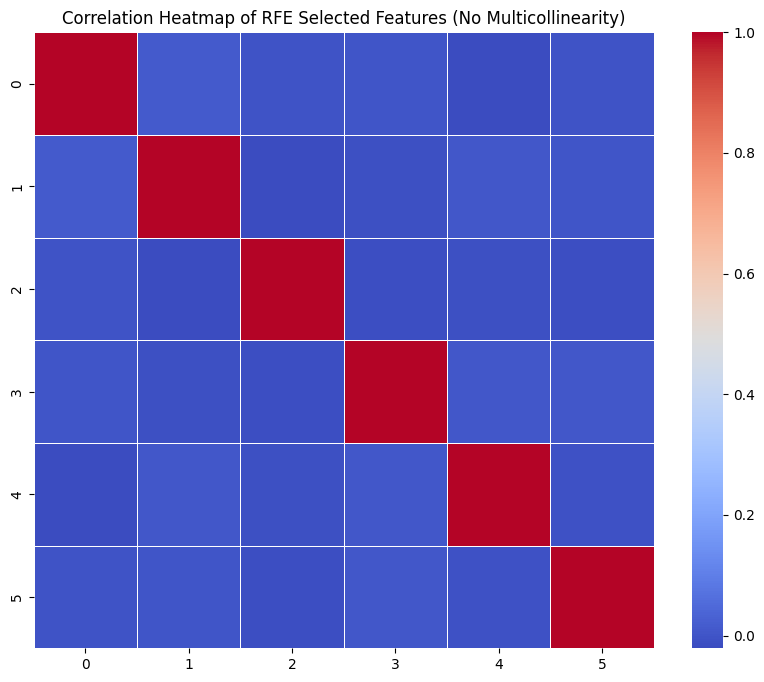

Base Estimator Accuracy: 0.9682080924855492
Cross-Validation Scores: [0.97472924 0.97472924 0.97101449 0.98913043 0.97826087]
AdaBoost Accuracy: 0.9682080924855492


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


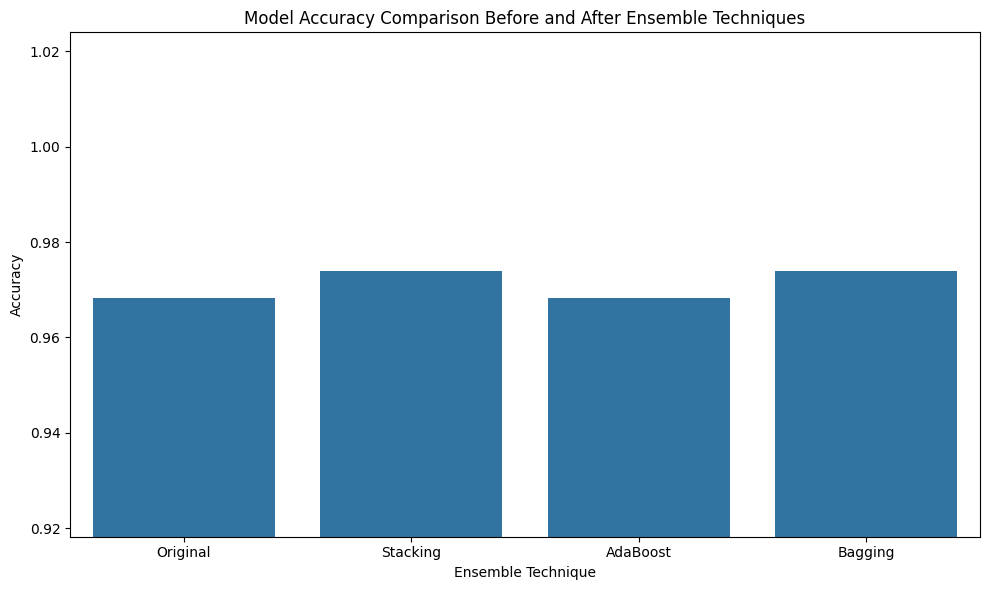

Summary of Model Accuracies:
Original: 96.82%
Stacking: 97.40%
AdaBoost: 96.82%
Bagging: 97.40%


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your car evaluation dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset2.csv')

# Display basic information about the dataset
print(dataset.info())
print(dataset.columns)

# Handle missing values
dataset.dropna(inplace=True)

# Handle duplicates
duplicates = dataset.duplicated()
print("Number of duplicate rows:", duplicates.sum())
dataset = dataset[~duplicates]

# Encode categorical variables
encoder = LabelEncoder()
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = encoder.fit_transform(dataset[col])

# Print summary statistics after cleaning
print("\nSummary Statistics After Cleaning:")
print(dataset.describe())

# Convert the dataset to a pandas DataFrame for easier manipulation
X = dataset.drop(columns=['class'])
y = dataset['class']

# Remove outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_no_outliers = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_no_outliers = y[X.index.isin(X_no_outliers.index)]

# Remove multicollinearity using VIF
def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.values, ix) for ix in range(len(variables))]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping {X.columns[maxloc]} with VIF={max_vif}")
            del variables[maxloc]
            dropped = True
    print(f'Remaining variables: {X.columns[variables]}')
    return X.iloc[:, variables]

X_no_multicollinearity = calculate_vif(X_no_outliers)

# Update target labels after removing outliers and multicollinearity
y_no_outliers_multicollinearity = y_no_outliers
X_no_outliers_multicollinearity = X_no_outliers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers_multicollinearity, y_no_outliers_multicollinearity, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train_scaled, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Convert selected features to DataFrame
df_selected_features = pd.DataFrame(X_train_selected)

# Calculate correlation matrix for selected features
correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features (No Multicollinearity)')
plt.show()

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Find the highest performing model
highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]

# Train and evaluate the highest performing model with RFE-selected features
# Train and evaluate the highest performing model with RFE-selected features
highest_model.fit(X_train_selected, y_train)
predictions_highest = highest_model.predict(X_test_selected)
accuracy_highest = accuracy_score(y_test, predictions_highest)

# Check base estimator performance separately
base_estimator_accuracy = highest_model.score(X_test_selected, y_test)
print(f"Base Estimator Accuracy: {base_estimator_accuracy}")

# If base estimator performs well, proceed with ensemble techniques
if base_estimator_accuracy > 0.5:  # Adjust threshold as needed
    # Apply ensemble techniques to the highest performing model
    # Stacking Classifier
    stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=LogisticRegression(max_iter=10000))
    stacking_model.fit(X_train_selected, y_train)
    stacking_accuracy = stacking_model.score(X_test_selected, y_test)

    from sklearn.ensemble import AdaBoostClassifier

    # Check base estimator stability (e.g., using cross-validation)
    from sklearn.model_selection import cross_val_score
    cv_scores = cross_val_score(highest_model, X_train_selected, y_train, cv=5)
    print("Cross-Validation Scores:", cv_scores)

    # Adjust AdaBoost parameters
    adaboost_model = AdaBoostClassifier(base_estimator=highest_model, n_estimators=100, learning_rate=0.1, algorithm='SAMME.R')
    adaboost_model.fit(X_train_selected, y_train)
    adaboost_accuracy = adaboost_model.score(X_test_selected, y_test)

    # Print AdaBoost accuracy
    print("AdaBoost Accuracy:", adaboost_accuracy)
    # Bagging Classifier
    bagging_model = BaggingClassifier(base_estimator=highest_model, n_estimators=100)
    bagging_model.fit(X_train_selected, y_train)
    bagging_accuracy = bagging_model.score(X_test_selected, y_test)

    # Plotting and summary
    models_accuracy = {
        "Original": accuracy_highest,
        "Stacking": stacking_accuracy,
        "AdaBoost": adaboost_accuracy,
        "Bagging": bagging_accuracy
    }

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()))
    plt.xlabel('Ensemble Technique')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison Before and After Ensemble Techniques')
    # Adjust the y-axis limits dynamically
    plt.ylim(min(models_accuracy.values()) - 0.05, max(models_accuracy.values()) + 0.05)
    plt.tight_layout()
    plt.show()

    # Print summary of all scores
    print("Summary of Model Accuracies:")
    for model, accuracy in models_accuracy.items():
        print(f"{model}: {accuracy*100:.2f}%")
else:
    print("Base estimator performs poorly. Adjust your model or data preparation.")
